# Estudo de reconhecimento do vinho

Para o primeiro trabalho, cujo o objetivo é resolver um problema de classificação multiclasses, escolhemos o dataset Wine recognition obtido em UCI ML https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data.

Os dados são resultados de uma análise química de vinhos cultivados na mesma região na Itália por três cultivadores diferentes. Existem treze medições diferentes feitas para diferentes constituintes encontrados nos três tipos de vinho.

Para este problema, vamos realizar o treinamento de uma rede neural artificial do tipo Perceptron Multicamadas.

## Análise do conjunto de dados

The data looks like this: 
    Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065 

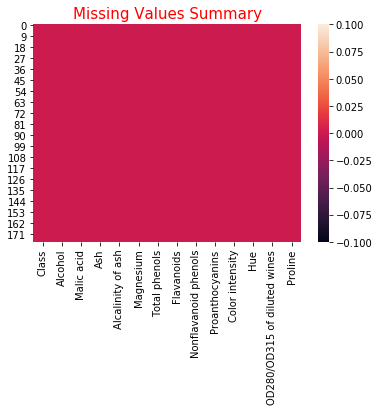

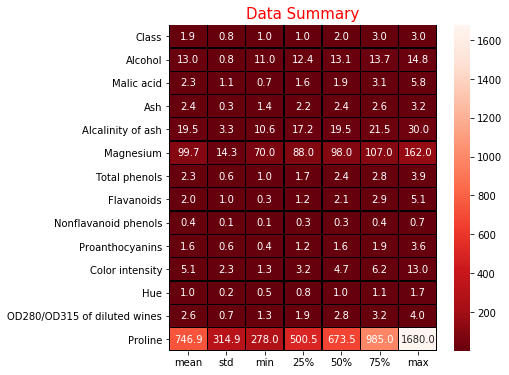

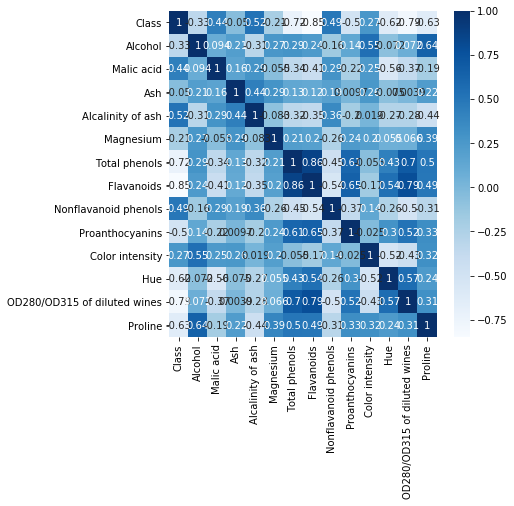

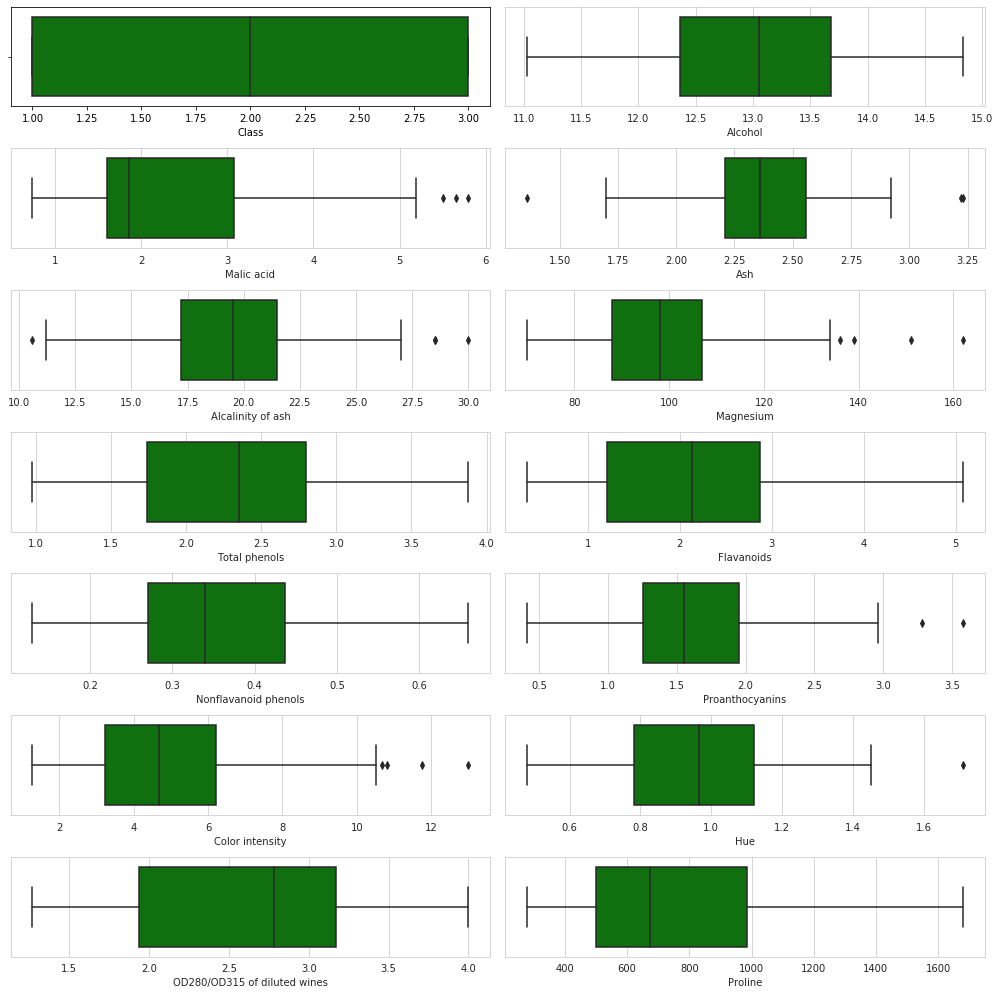

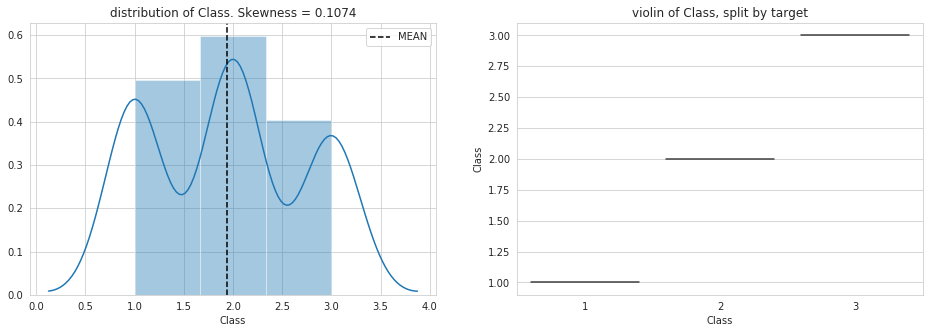

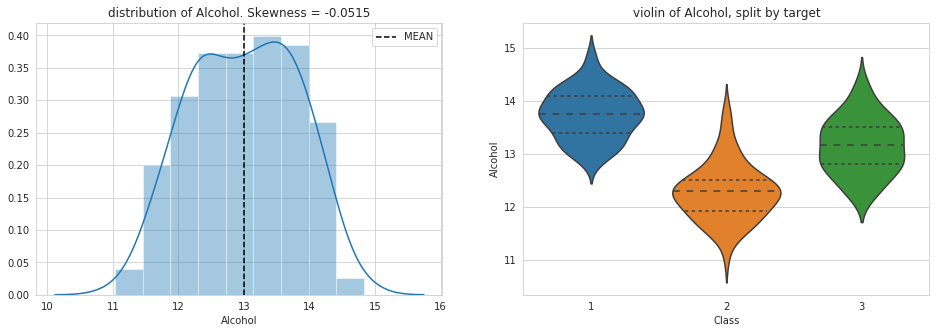

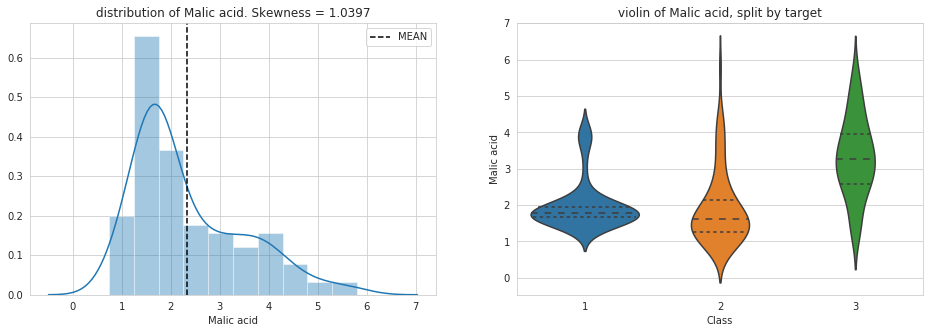

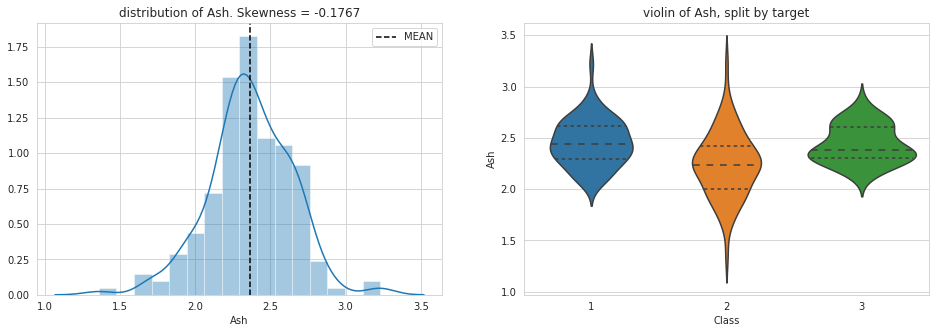

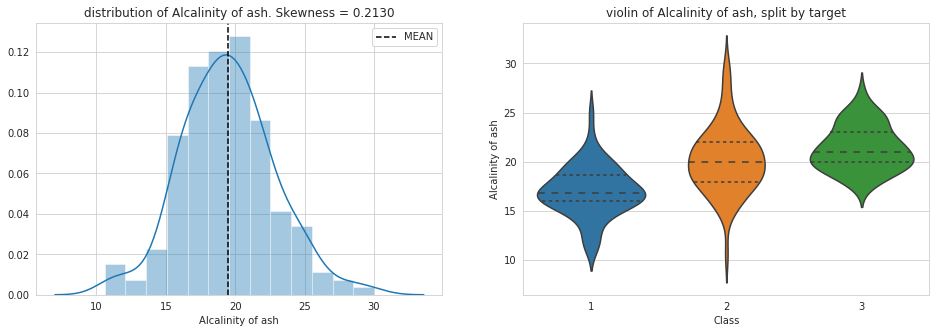

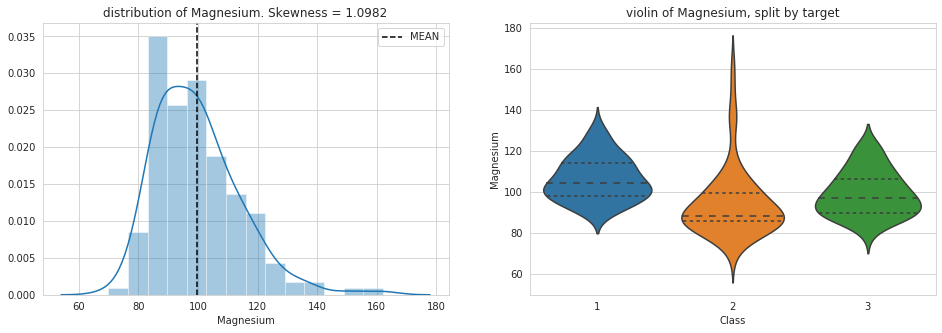

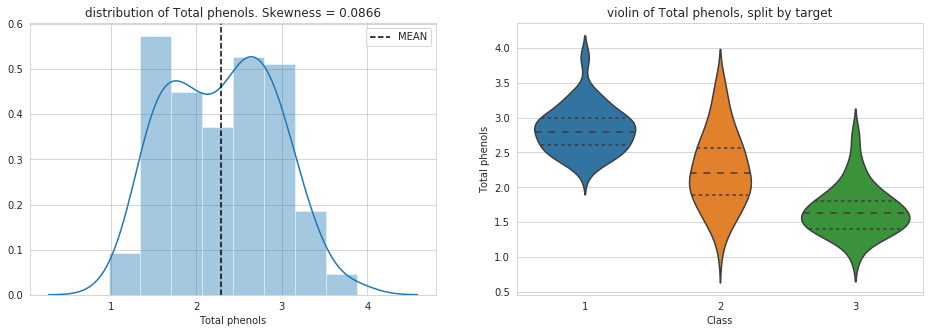

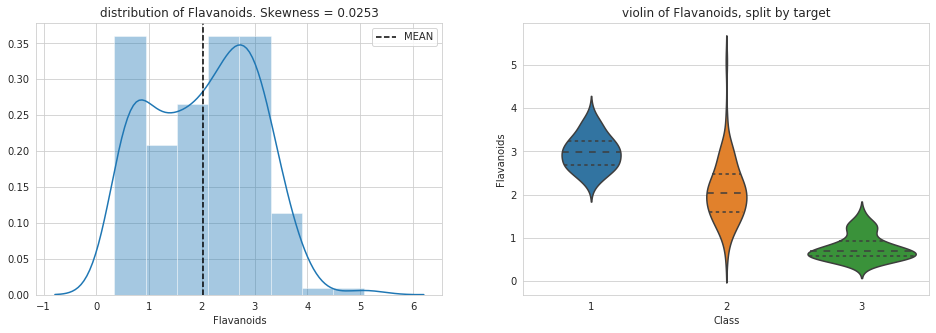

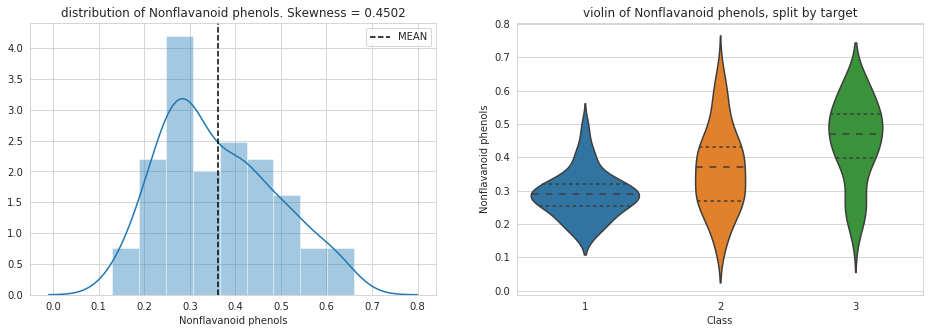

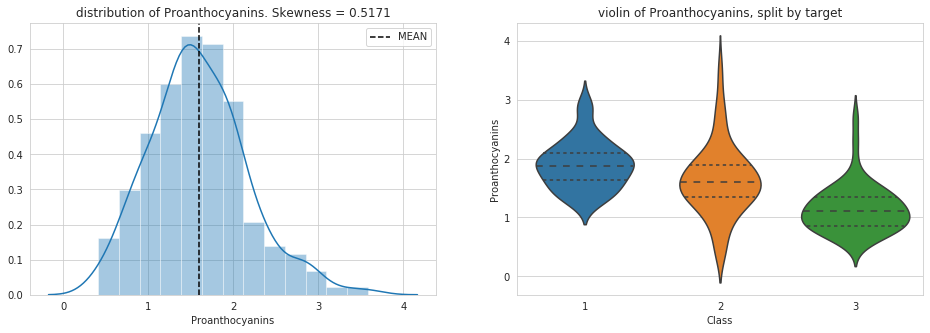

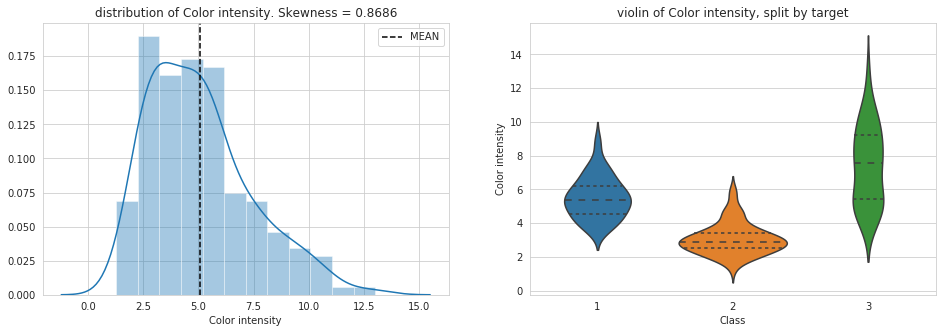

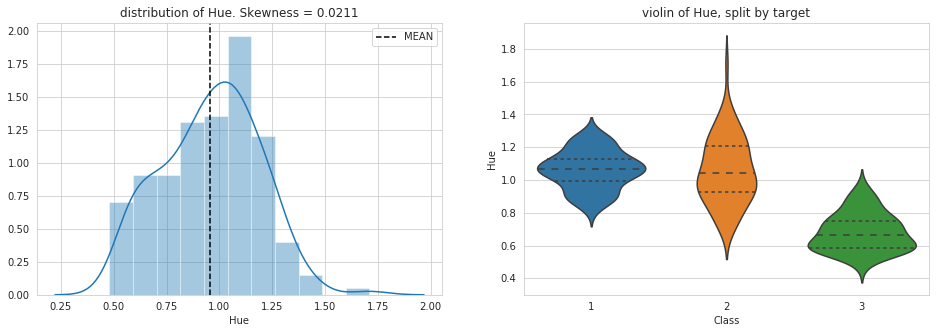

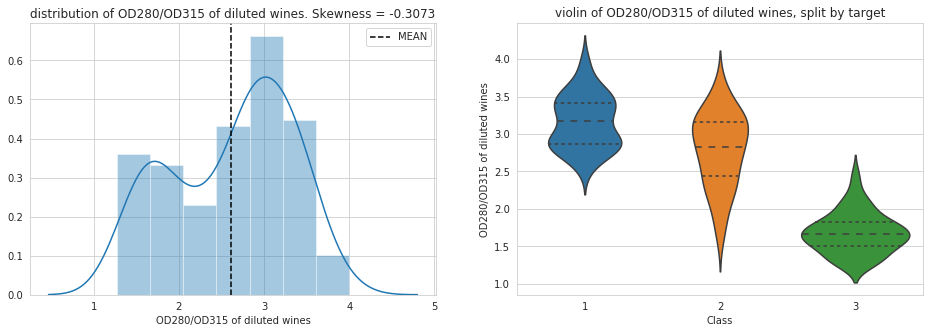

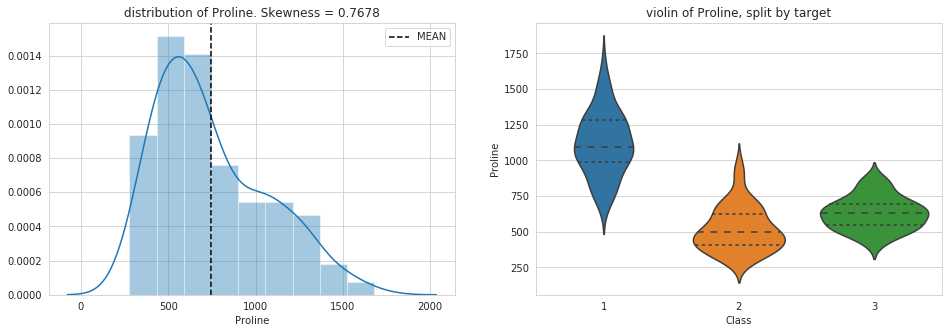

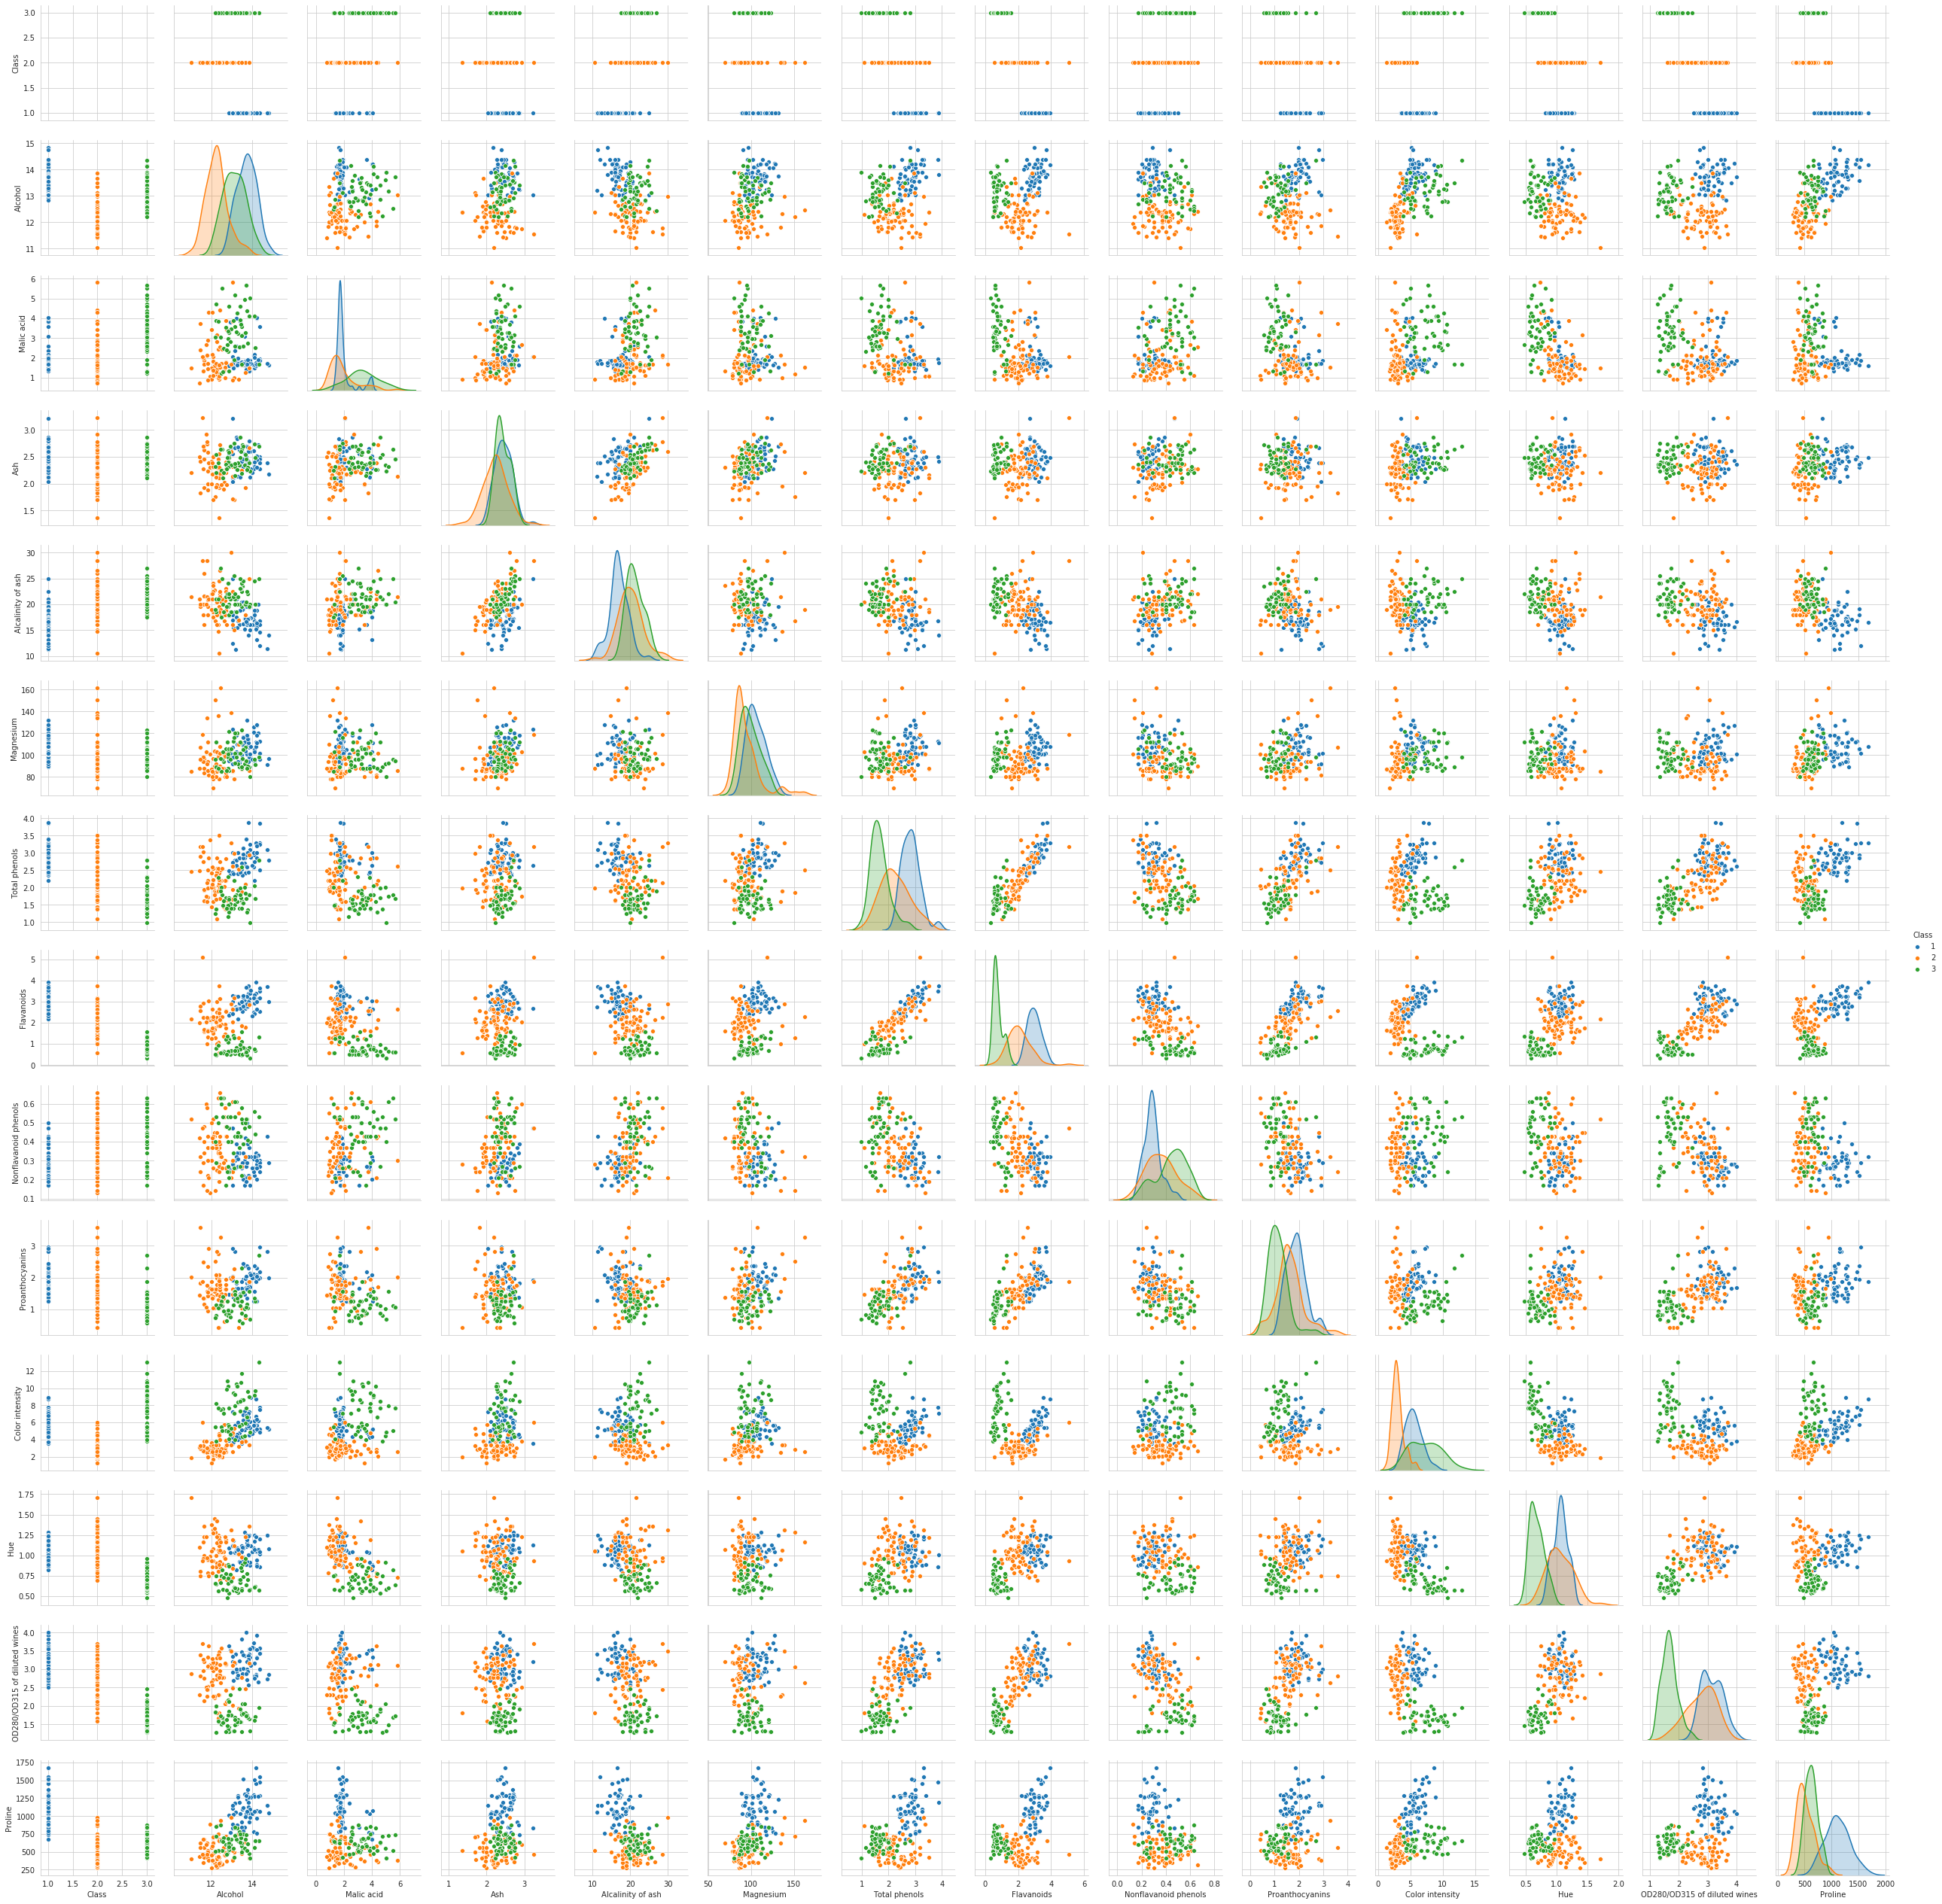

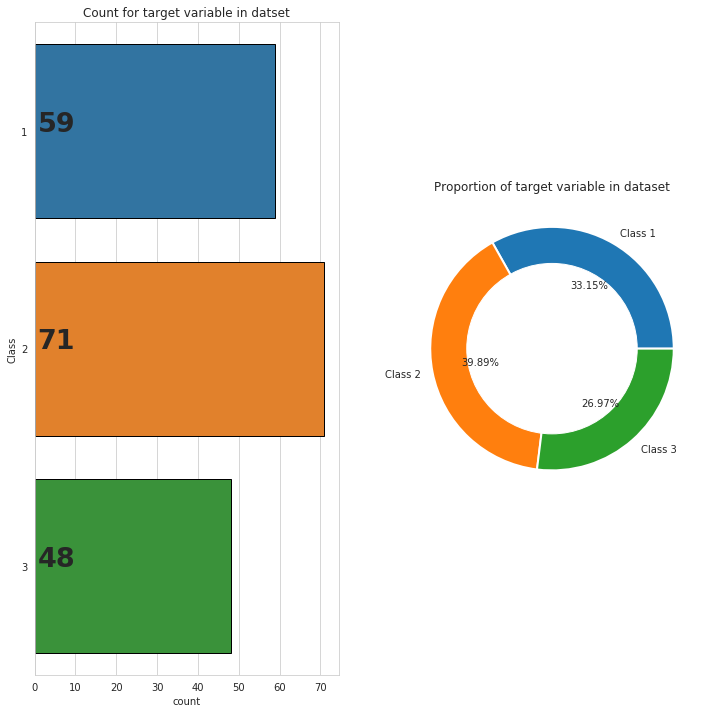

In [1]:
# Importa módulo autoEDA para análise exploratória de dados
from ClfAutoEDA import *

# Carrega o conjunto de dados wine com pandas
df=pd.read_csv('wine.csv')

# Configura algumas variáveis para o módulo EDA
target_variable_name='Class'
labels=['Class 1','Class 2','Class 3']

# Chama a função EDA para análise dos dados
df_processed,num_features,cat_features=EDA(df,labels,
                                         target_variable_name,
                                         data_summary_figsize=(6,6),
                                         corr_matrix_figsize=(6,6), 
                                         corr_matrix_annot=True,
                                         pairplt=True)

## Preprocessamento dos dados

In [2]:
# Importa a matrix de confusão para criação das métricas
from sklearn.metrics import confusion_matrix

# Importa o modelo de classificação perceptron multicamadas
from sklearn.neural_network import MLPClassifier

# Importa a validação cruzada
from sklearn.model_selection import StratifiedKFold

# Importa utilitário que organiza aleatoriamente as matrizes de dados
from sklearn.utils import shuffle

# Importa utilitário para normalização dos dados
from sklearn.preprocessing import MinMaxScaler

from time import process_time

In [3]:
# separa as colunas de features e label e guarda nas variáveis x e y respectivamente
x = df.iloc [:, [1,2,3,4,5,6,7,8,9,10,11,12,13]]
y = df.iloc [:, [0]]

# retorna apenas os dados e despresa o cabeçalho do dataset
x = x.values
y = y.values

# verifica o valor mínimo e máximo
print(x.min())
print(x.max())
print(y.min())
print(y.max())

# normaliza os dados 
x = MinMaxScaler().fit_transform(x)

# verifica o valor mínimo e máximo normalizado
print(x.min())
print(x.max())

0.13
1680.0
1
3
0.0
1.0


## Treinamento do modelo

In [4]:
# Configuração dos parâmetros

# Num de epocas
epocas = 1000

# K Folds para validação cruzada
k = 10

# Arquitetura da preceptron multicamadas
mlp = MLPClassifier(hidden_layer_sizes=(256,), activation='relu', max_iter=epocas, alpha=1e-4,
                     solver='sgd', verbose=True, tol=1e-10, random_state=1, learning_rate_init=.01)

time_train_mlp = []
acuracia_mlp = []
precisao_mlp = []

# Validação cruzada com k folds
skf = StratifiedKFold(n_splits=k, random_state=None)

# Com K folds definido, separa dados de validação e treinamento - repetir k vezes
for train_index, test_index in skf.split(x, y): 

    print("Train:", train_index, "Validation:", test_index) 
    
    x_treinamento, x_validacao = x[train_index], x[test_index] 
    y_treinamento, y_validacao = y[train_index], y[test_index]
    
    # para garantir serem randomicos
    x_treinamento, y_treinamento = shuffle(x_treinamento, y_treinamento, random_state = 42)
    x_validacao, y_validacao = shuffle(x_validacao, y_validacao, random_state = 42)

    # Aqui fazer um treinamento de x épocas e uma validacao da MLP
    start = process_time()
    mlp.fit(x_treinamento, y_treinamento)
    end = process_time()
    time_mlp = end - start

    # Métricas da validacão mlp
    preds_val_mlp = mlp.predict(x_validacao)  
    cm_val_mlp = confusion_matrix(y_validacao, preds_val_mlp)
    TP = cm_val_mlp[0,0]
    FP = cm_val_mlp[0,1]
    FN = cm_val_mlp[1,0]
    TN = cm_val_mlp[1,1]

    acuracia_mlp_ = (TP+TN)*100/(len(y_validacao))
    precisao_mlp_ = TP*100/(TP+FP)

    # Usar no calculo das médias da mlp
    time_train_mlp.append(time_mlp)
    acuracia_mlp.append(acuracia_mlp_)
    precisao_mlp.append(precisao_mlp_)

media_time_train_mlp = sum(time_train_mlp) / float(len(time_train_mlp))
media_acuracia_mlp = sum(acuracia_mlp) / float(len(acuracia_mlp))
media_precisao_mlp = sum(precisao_mlp) / float(len(precisao_mlp))

print('Tempo médio de treinamento MLP com ' + str(k) + ' kfold ' + str (media_time_train_mlp))
print('Médias das Validações com ' + str(k) + ' folds')
print('Acurácia_mlp: ' + str(media_acuracia_mlp))
print('Precisão_mlp: ' + str(media_precisao_mlp))

Train: [  6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23
  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  66
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177] Validation: [  0   1   2   3   4   5  59  60  61  62  63  64  65 130 131 132 133 134]
Iteration 1, loss = 1.07730492
Iteration 2, loss = 1.07293133
Iteration 3, loss = 1.06683150
Iteration 4, loss = 1.05929737
Iteration 5, loss = 1.05061768
Iteration 6, loss = 1.04101458
Iteration 7, loss = 1.03067779
Iteration 8, loss = 1.01978755
Iteration

Iteration 275, loss = 0.09489027
Iteration 276, loss = 0.09456940
Iteration 277, loss = 0.09425093
Iteration 278, loss = 0.09393475
Iteration 279, loss = 0.09362086
Iteration 280, loss = 0.09330930
Iteration 281, loss = 0.09299990
Iteration 282, loss = 0.09269284
Iteration 283, loss = 0.09238797
Iteration 284, loss = 0.09208523
Iteration 285, loss = 0.09178466
Iteration 286, loss = 0.09148618
Iteration 287, loss = 0.09118986
Iteration 288, loss = 0.09089556
Iteration 289, loss = 0.09060332
Iteration 290, loss = 0.09031308
Iteration 291, loss = 0.09002485
Iteration 292, loss = 0.08973862
Iteration 293, loss = 0.08945430
Iteration 294, loss = 0.08917202
Iteration 295, loss = 0.08889162
Iteration 296, loss = 0.08861313
Iteration 297, loss = 0.08833662
Iteration 298, loss = 0.08806191
Iteration 299, loss = 0.08778909
Iteration 300, loss = 0.08751803
Iteration 301, loss = 0.08724881
Iteration 302, loss = 0.08698133
Iteration 303, loss = 0.08671564
Iteration 304, loss = 0.08645156
Iteration 

Iteration 585, loss = 0.04695913
Iteration 586, loss = 0.04688217
Iteration 587, loss = 0.04680546
Iteration 588, loss = 0.04672901
Iteration 589, loss = 0.04665275
Iteration 590, loss = 0.04657677
Iteration 591, loss = 0.04650099
Iteration 592, loss = 0.04642546
Iteration 593, loss = 0.04635013
Iteration 594, loss = 0.04627507
Iteration 595, loss = 0.04620020
Iteration 596, loss = 0.04612557
Iteration 597, loss = 0.04605120
Iteration 598, loss = 0.04597699
Iteration 599, loss = 0.04590304
Iteration 600, loss = 0.04582930
Iteration 601, loss = 0.04575580
Iteration 602, loss = 0.04568251
Iteration 603, loss = 0.04560943
Iteration 604, loss = 0.04553659
Iteration 605, loss = 0.04546392
Iteration 606, loss = 0.04539153
Iteration 607, loss = 0.04531930
Iteration 608, loss = 0.04524730
Iteration 609, loss = 0.04517553
Iteration 610, loss = 0.04510395
Iteration 611, loss = 0.04503260
Iteration 612, loss = 0.04496144
Iteration 613, loss = 0.04489050
Iteration 614, loss = 0.04481979
Iteration 

Iteration 883, loss = 0.03119734
Iteration 884, loss = 0.03116104
Iteration 885, loss = 0.03112481
Iteration 886, loss = 0.03108864
Iteration 887, loss = 0.03105258
Iteration 888, loss = 0.03101657
Iteration 889, loss = 0.03098063
Iteration 890, loss = 0.03094480
Iteration 891, loss = 0.03090900
Iteration 892, loss = 0.03087331
Iteration 893, loss = 0.03083769
Iteration 894, loss = 0.03080212
Iteration 895, loss = 0.03076665
Iteration 896, loss = 0.03073126
Iteration 897, loss = 0.03069592
Iteration 898, loss = 0.03066065
Iteration 899, loss = 0.03062546
Iteration 900, loss = 0.03059033
Iteration 901, loss = 0.03055528
Iteration 902, loss = 0.03052031
Iteration 903, loss = 0.03048540
Iteration 904, loss = 0.03045057
Iteration 905, loss = 0.03041580
Iteration 906, loss = 0.03038111
Iteration 907, loss = 0.03034648
Iteration 908, loss = 0.03031194
Iteration 909, loss = 0.03027746
Iteration 910, loss = 0.03024304
Iteration 911, loss = 0.03020872
Iteration 912, loss = 0.03017443
Iteration 

Iteration 190, loss = 0.13836602
Iteration 191, loss = 0.13761593
Iteration 192, loss = 0.13687458
Iteration 193, loss = 0.13614176
Iteration 194, loss = 0.13541733
Iteration 195, loss = 0.13470103
Iteration 196, loss = 0.13399281
Iteration 197, loss = 0.13329251
Iteration 198, loss = 0.13260016
Iteration 199, loss = 0.13191564
Iteration 200, loss = 0.13123865
Iteration 201, loss = 0.13056907
Iteration 202, loss = 0.12990682
Iteration 203, loss = 0.12925163
Iteration 204, loss = 0.12860355
Iteration 205, loss = 0.12796259
Iteration 206, loss = 0.12732843
Iteration 207, loss = 0.12670095
Iteration 208, loss = 0.12607998
Iteration 209, loss = 0.12546542
Iteration 210, loss = 0.12485726
Iteration 211, loss = 0.12425532
Iteration 212, loss = 0.12365957
Iteration 213, loss = 0.12306993
Iteration 214, loss = 0.12248632
Iteration 215, loss = 0.12190861
Iteration 216, loss = 0.12133673
Iteration 217, loss = 0.12077048
Iteration 218, loss = 0.12020974
Iteration 219, loss = 0.11965453
Iteration 

Iteration 498, loss = 0.05284153
Iteration 499, loss = 0.05273416
Iteration 500, loss = 0.05262717
Iteration 501, loss = 0.05252061
Iteration 502, loss = 0.05241443
Iteration 503, loss = 0.05230866
Iteration 504, loss = 0.05220327
Iteration 505, loss = 0.05209830
Iteration 506, loss = 0.05199371
Iteration 507, loss = 0.05188951
Iteration 508, loss = 0.05178571
Iteration 509, loss = 0.05168230
Iteration 510, loss = 0.05157926
Iteration 511, loss = 0.05147662
Iteration 512, loss = 0.05137435
Iteration 513, loss = 0.05127247
Iteration 514, loss = 0.05117094
Iteration 515, loss = 0.05106979
Iteration 516, loss = 0.05096905
Iteration 517, loss = 0.05086863
Iteration 518, loss = 0.05076859
Iteration 519, loss = 0.05066893
Iteration 520, loss = 0.05056965
Iteration 521, loss = 0.05047070
Iteration 522, loss = 0.05037210
Iteration 523, loss = 0.05027389
Iteration 524, loss = 0.05017602
Iteration 525, loss = 0.05007848
Iteration 526, loss = 0.04998131
Iteration 527, loss = 0.04988449
Iteration 

Iteration 806, loss = 0.03187391
Iteration 807, loss = 0.03183089
Iteration 808, loss = 0.03178795
Iteration 809, loss = 0.03174512
Iteration 810, loss = 0.03170240
Iteration 811, loss = 0.03165976
Iteration 812, loss = 0.03161725
Iteration 813, loss = 0.03157482
Iteration 814, loss = 0.03153248
Iteration 815, loss = 0.03149027
Iteration 816, loss = 0.03144814
Iteration 817, loss = 0.03140610
Iteration 818, loss = 0.03136419
Iteration 819, loss = 0.03132235
Iteration 820, loss = 0.03128062
Iteration 821, loss = 0.03123899
Iteration 822, loss = 0.03119745
Iteration 823, loss = 0.03115601
Iteration 824, loss = 0.03111468
Iteration 825, loss = 0.03107342
Iteration 826, loss = 0.03103228
Iteration 827, loss = 0.03099122
Iteration 828, loss = 0.03095026
Iteration 829, loss = 0.03090938
Iteration 830, loss = 0.03086863
Iteration 831, loss = 0.03082793
Iteration 832, loss = 0.03078734
Iteration 833, loss = 0.03074686
Iteration 834, loss = 0.03070646
Iteration 835, loss = 0.03066614
Iteration 

Iteration 75, loss = 0.39112889
Iteration 76, loss = 0.38575656
Iteration 77, loss = 0.38049817
Iteration 78, loss = 0.37534911
Iteration 79, loss = 0.37030677
Iteration 80, loss = 0.36537088
Iteration 81, loss = 0.36053840
Iteration 82, loss = 0.35580675
Iteration 83, loss = 0.35117514
Iteration 84, loss = 0.34664138
Iteration 85, loss = 0.34220410
Iteration 86, loss = 0.33786081
Iteration 87, loss = 0.33360832
Iteration 88, loss = 0.32944484
Iteration 89, loss = 0.32536911
Iteration 90, loss = 0.32137808
Iteration 91, loss = 0.31747152
Iteration 92, loss = 0.31364747
Iteration 93, loss = 0.30990428
Iteration 94, loss = 0.30624169
Iteration 95, loss = 0.30265749
Iteration 96, loss = 0.29915025
Iteration 97, loss = 0.29571694
Iteration 98, loss = 0.29235439
Iteration 99, loss = 0.28905934
Iteration 100, loss = 0.28583109
Iteration 101, loss = 0.28266876
Iteration 102, loss = 0.27957114
Iteration 103, loss = 0.27653641
Iteration 104, loss = 0.27356177
Iteration 105, loss = 0.27064723
It

Iteration 383, loss = 0.07177559
Iteration 384, loss = 0.07159275
Iteration 385, loss = 0.07141086
Iteration 386, loss = 0.07122986
Iteration 387, loss = 0.07104979
Iteration 388, loss = 0.07087062
Iteration 389, loss = 0.07069239
Iteration 390, loss = 0.07051505
Iteration 391, loss = 0.07033858
Iteration 392, loss = 0.07016299
Iteration 393, loss = 0.06998829
Iteration 394, loss = 0.06981446
Iteration 395, loss = 0.06964149
Iteration 396, loss = 0.06946935
Iteration 397, loss = 0.06929809
Iteration 398, loss = 0.06912770
Iteration 399, loss = 0.06895811
Iteration 400, loss = 0.06878939
Iteration 401, loss = 0.06862151
Iteration 402, loss = 0.06845442
Iteration 403, loss = 0.06828816
Iteration 404, loss = 0.06812271
Iteration 405, loss = 0.06795808
Iteration 406, loss = 0.06779426
Iteration 407, loss = 0.06763120
Iteration 408, loss = 0.06746893
Iteration 409, loss = 0.06730746
Iteration 410, loss = 0.06714674
Iteration 411, loss = 0.06698680
Iteration 412, loss = 0.06682762
Iteration 

Iteration 669, loss = 0.04150005
Iteration 670, loss = 0.04143899
Iteration 671, loss = 0.04137813
Iteration 672, loss = 0.04131745
Iteration 673, loss = 0.04125694
Iteration 674, loss = 0.04119662
Iteration 675, loss = 0.04113647
Iteration 676, loss = 0.04107650
Iteration 677, loss = 0.04101670
Iteration 678, loss = 0.04095707
Iteration 679, loss = 0.04089764
Iteration 680, loss = 0.04083838
Iteration 681, loss = 0.04077926
Iteration 682, loss = 0.04072035
Iteration 683, loss = 0.04066158
Iteration 684, loss = 0.04060300
Iteration 685, loss = 0.04054458
Iteration 686, loss = 0.04048633
Iteration 687, loss = 0.04042825
Iteration 688, loss = 0.04037033
Iteration 689, loss = 0.04031259
Iteration 690, loss = 0.04025499
Iteration 691, loss = 0.04019759
Iteration 692, loss = 0.04014032
Iteration 693, loss = 0.04008324
Iteration 694, loss = 0.04002630
Iteration 695, loss = 0.03996953
Iteration 696, loss = 0.03991293
Iteration 697, loss = 0.03985647
Iteration 698, loss = 0.03980018
Iteration 

Iteration 927, loss = 0.03006872
Iteration 928, loss = 0.03003662
Iteration 929, loss = 0.03000458
Iteration 930, loss = 0.02997263
Iteration 931, loss = 0.02994073
Iteration 932, loss = 0.02990889
Iteration 933, loss = 0.02987714
Iteration 934, loss = 0.02984543
Iteration 935, loss = 0.02981380
Iteration 936, loss = 0.02978224
Iteration 937, loss = 0.02975074
Iteration 938, loss = 0.02971931
Iteration 939, loss = 0.02968795
Iteration 940, loss = 0.02965664
Iteration 941, loss = 0.02962540
Iteration 942, loss = 0.02959423
Iteration 943, loss = 0.02956312
Iteration 944, loss = 0.02953208
Iteration 945, loss = 0.02950110
Iteration 946, loss = 0.02947019
Iteration 947, loss = 0.02943934
Iteration 948, loss = 0.02940856
Iteration 949, loss = 0.02937783
Iteration 950, loss = 0.02934718
Iteration 951, loss = 0.02931659
Iteration 952, loss = 0.02928605
Iteration 953, loss = 0.02925559
Iteration 954, loss = 0.02922518
Iteration 955, loss = 0.02919484
Iteration 956, loss = 0.02916456
Iteration 

Iteration 235, loss = 0.11328442
Iteration 236, loss = 0.11279322
Iteration 237, loss = 0.11230653
Iteration 238, loss = 0.11182429
Iteration 239, loss = 0.11134631
Iteration 240, loss = 0.11087267
Iteration 241, loss = 0.11040325
Iteration 242, loss = 0.10993801
Iteration 243, loss = 0.10947692
Iteration 244, loss = 0.10901992
Iteration 245, loss = 0.10856694
Iteration 246, loss = 0.10811792
Iteration 247, loss = 0.10767280
Iteration 248, loss = 0.10723152
Iteration 249, loss = 0.10679397
Iteration 250, loss = 0.10636019
Iteration 251, loss = 0.10593010
Iteration 252, loss = 0.10550360
Iteration 253, loss = 0.10508072
Iteration 254, loss = 0.10466132
Iteration 255, loss = 0.10424552
Iteration 256, loss = 0.10383317
Iteration 257, loss = 0.10342422
Iteration 258, loss = 0.10301864
Iteration 259, loss = 0.10261644
Iteration 260, loss = 0.10221748
Iteration 261, loss = 0.10182177
Iteration 262, loss = 0.10142921
Iteration 263, loss = 0.10103980
Iteration 264, loss = 0.10065350
Iteration 

Iteration 537, loss = 0.04951960
Iteration 538, loss = 0.04942703
Iteration 539, loss = 0.04933480
Iteration 540, loss = 0.04924293
Iteration 541, loss = 0.04915133
Iteration 542, loss = 0.04906012
Iteration 543, loss = 0.04896919
Iteration 544, loss = 0.04887861
Iteration 545, loss = 0.04878833
Iteration 546, loss = 0.04869840
Iteration 547, loss = 0.04860880
Iteration 548, loss = 0.04851946
Iteration 549, loss = 0.04843049
Iteration 550, loss = 0.04834183
Iteration 551, loss = 0.04825347
Iteration 552, loss = 0.04816542
Iteration 553, loss = 0.04807772
Iteration 554, loss = 0.04799028
Iteration 555, loss = 0.04790316
Iteration 556, loss = 0.04781637
Iteration 557, loss = 0.04772985
Iteration 558, loss = 0.04764366
Iteration 559, loss = 0.04755774
Iteration 560, loss = 0.04747216
Iteration 561, loss = 0.04738685
Iteration 562, loss = 0.04730184
Iteration 563, loss = 0.04721712
Iteration 564, loss = 0.04713270
Iteration 565, loss = 0.04704857
Iteration 566, loss = 0.04696472
Iteration 

Iteration 853, loss = 0.03089233
Iteration 854, loss = 0.03085493
Iteration 855, loss = 0.03081764
Iteration 856, loss = 0.03078042
Iteration 857, loss = 0.03074328
Iteration 858, loss = 0.03070625
Iteration 859, loss = 0.03066929
Iteration 860, loss = 0.03063242
Iteration 861, loss = 0.03059561
Iteration 862, loss = 0.03055892
Iteration 863, loss = 0.03052230
Iteration 864, loss = 0.03048576
Iteration 865, loss = 0.03044930
Iteration 866, loss = 0.03041294
Iteration 867, loss = 0.03037665
Iteration 868, loss = 0.03034044
Iteration 869, loss = 0.03030432
Iteration 870, loss = 0.03026828
Iteration 871, loss = 0.03023233
Iteration 872, loss = 0.03019644
Iteration 873, loss = 0.03016064
Iteration 874, loss = 0.03012493
Iteration 875, loss = 0.03008931
Iteration 876, loss = 0.03005375
Iteration 877, loss = 0.03001829
Iteration 878, loss = 0.02998288
Iteration 879, loss = 0.02994758
Iteration 880, loss = 0.02991236
Iteration 881, loss = 0.02987720
Iteration 882, loss = 0.02984213
Iteration 

Iteration 167, loss = 0.16414654
Iteration 168, loss = 0.16309718
Iteration 169, loss = 0.16206223
Iteration 170, loss = 0.16104130
Iteration 171, loss = 0.16003450
Iteration 172, loss = 0.15904108
Iteration 173, loss = 0.15806079
Iteration 174, loss = 0.15709347
Iteration 175, loss = 0.15613866
Iteration 176, loss = 0.15519610
Iteration 177, loss = 0.15426561
Iteration 178, loss = 0.15334691
Iteration 179, loss = 0.15243986
Iteration 180, loss = 0.15154418
Iteration 181, loss = 0.15065962
Iteration 182, loss = 0.14978602
Iteration 183, loss = 0.14892343
Iteration 184, loss = 0.14807179
Iteration 185, loss = 0.14723039
Iteration 186, loss = 0.14639925
Iteration 187, loss = 0.14557819
Iteration 188, loss = 0.14476698
Iteration 189, loss = 0.14396547
Iteration 190, loss = 0.14317369
Iteration 191, loss = 0.14239122
Iteration 192, loss = 0.14161800
Iteration 193, loss = 0.14085368
Iteration 194, loss = 0.14009813
Iteration 195, loss = 0.13935122
Iteration 196, loss = 0.13861300
Iteration 

Iteration 474, loss = 0.05817524
Iteration 475, loss = 0.05805850
Iteration 476, loss = 0.05794225
Iteration 477, loss = 0.05782648
Iteration 478, loss = 0.05771122
Iteration 479, loss = 0.05759643
Iteration 480, loss = 0.05748212
Iteration 481, loss = 0.05736830
Iteration 482, loss = 0.05725493
Iteration 483, loss = 0.05714203
Iteration 484, loss = 0.05702961
Iteration 485, loss = 0.05691762
Iteration 486, loss = 0.05680610
Iteration 487, loss = 0.05669503
Iteration 488, loss = 0.05658442
Iteration 489, loss = 0.05647425
Iteration 490, loss = 0.05636451
Iteration 491, loss = 0.05625523
Iteration 492, loss = 0.05614637
Iteration 493, loss = 0.05603796
Iteration 494, loss = 0.05592997
Iteration 495, loss = 0.05582241
Iteration 496, loss = 0.05571529
Iteration 497, loss = 0.05560859
Iteration 498, loss = 0.05550233
Iteration 499, loss = 0.05539647
Iteration 500, loss = 0.05529104
Iteration 501, loss = 0.05518601
Iteration 502, loss = 0.05508140
Iteration 503, loss = 0.05497719
Iteration 

Iteration 739, loss = 0.03809325
Iteration 740, loss = 0.03804390
Iteration 741, loss = 0.03799470
Iteration 742, loss = 0.03794560
Iteration 743, loss = 0.03789664
Iteration 744, loss = 0.03784780
Iteration 745, loss = 0.03779909
Iteration 746, loss = 0.03775050
Iteration 747, loss = 0.03770204
Iteration 748, loss = 0.03765370
Iteration 749, loss = 0.03760548
Iteration 750, loss = 0.03755738
Iteration 751, loss = 0.03750942
Iteration 752, loss = 0.03746156
Iteration 753, loss = 0.03741384
Iteration 754, loss = 0.03736622
Iteration 755, loss = 0.03731874
Iteration 756, loss = 0.03727136
Iteration 757, loss = 0.03722412
Iteration 758, loss = 0.03717698
Iteration 759, loss = 0.03712997
Iteration 760, loss = 0.03708308
Iteration 761, loss = 0.03703629
Iteration 762, loss = 0.03698963
Iteration 763, loss = 0.03694309
Iteration 764, loss = 0.03689665
Iteration 765, loss = 0.03685034
Iteration 766, loss = 0.03680414
Iteration 767, loss = 0.03675806
Iteration 768, loss = 0.03671209
Iteration 

Iteration 997, loss = 0.02852044
Iteration 998, loss = 0.02849253
Iteration 999, loss = 0.02846468
Iteration 1000, loss = 0.02843689
Train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177] Validation: [ 30  31  32  33  34  35  94  95  96  97  98  99 100 155 156 157 158 159]
Iteration 1, loss = 1.07511374
Iteration 2, loss = 1.07078809
Iteration 3, loss = 1.06475919
Iteration 4, loss = 1.05731941


Iteration 301, loss = 0.09394286
Iteration 302, loss = 0.09364968
Iteration 303, loss = 0.09335841
Iteration 304, loss = 0.09306906
Iteration 305, loss = 0.09278157
Iteration 306, loss = 0.09249591
Iteration 307, loss = 0.09221211
Iteration 308, loss = 0.09193013
Iteration 309, loss = 0.09164994
Iteration 310, loss = 0.09137166
Iteration 311, loss = 0.09109516
Iteration 312, loss = 0.09082046
Iteration 313, loss = 0.09054749
Iteration 314, loss = 0.09027623
Iteration 315, loss = 0.09000669
Iteration 316, loss = 0.08973880
Iteration 317, loss = 0.08947262
Iteration 318, loss = 0.08920807
Iteration 319, loss = 0.08894519
Iteration 320, loss = 0.08868393
Iteration 321, loss = 0.08842423
Iteration 322, loss = 0.08816612
Iteration 323, loss = 0.08790959
Iteration 324, loss = 0.08765459
Iteration 325, loss = 0.08740114
Iteration 326, loss = 0.08714922
Iteration 327, loss = 0.08689881
Iteration 328, loss = 0.08664988
Iteration 329, loss = 0.08640245
Iteration 330, loss = 0.08615644
Iteration 

Iteration 591, loss = 0.04978281
Iteration 592, loss = 0.04970293
Iteration 593, loss = 0.04962329
Iteration 594, loss = 0.04954392
Iteration 595, loss = 0.04946478
Iteration 596, loss = 0.04938591
Iteration 597, loss = 0.04930728
Iteration 598, loss = 0.04922889
Iteration 599, loss = 0.04915076
Iteration 600, loss = 0.04907288
Iteration 601, loss = 0.04899525
Iteration 602, loss = 0.04891785
Iteration 603, loss = 0.04884070
Iteration 604, loss = 0.04876378
Iteration 605, loss = 0.04868715
Iteration 606, loss = 0.04861079
Iteration 607, loss = 0.04853468
Iteration 608, loss = 0.04845879
Iteration 609, loss = 0.04838315
Iteration 610, loss = 0.04830774
Iteration 611, loss = 0.04823259
Iteration 612, loss = 0.04815765
Iteration 613, loss = 0.04808295
Iteration 614, loss = 0.04800849
Iteration 615, loss = 0.04793425
Iteration 616, loss = 0.04786028
Iteration 617, loss = 0.04778648
Iteration 618, loss = 0.04771293
Iteration 619, loss = 0.04763960
Iteration 620, loss = 0.04756648
Iteration 

Iteration 901, loss = 0.03320345
Iteration 902, loss = 0.03316758
Iteration 903, loss = 0.03313178
Iteration 904, loss = 0.03309605
Iteration 905, loss = 0.03306041
Iteration 906, loss = 0.03302484
Iteration 907, loss = 0.03298933
Iteration 908, loss = 0.03295393
Iteration 909, loss = 0.03291856
Iteration 910, loss = 0.03288330
Iteration 911, loss = 0.03284810
Iteration 912, loss = 0.03281296
Iteration 913, loss = 0.03277791
Iteration 914, loss = 0.03274294
Iteration 915, loss = 0.03270801
Iteration 916, loss = 0.03267317
Iteration 917, loss = 0.03263843
Iteration 918, loss = 0.03260373
Iteration 919, loss = 0.03256911
Iteration 920, loss = 0.03253455
Iteration 921, loss = 0.03250009
Iteration 922, loss = 0.03246567
Iteration 923, loss = 0.03243134
Iteration 924, loss = 0.03239708
Iteration 925, loss = 0.03236288
Iteration 926, loss = 0.03232876
Iteration 927, loss = 0.03229471
Iteration 928, loss = 0.03226072
Iteration 929, loss = 0.03222682
Iteration 930, loss = 0.03219297
Iteration 

Iteration 208, loss = 0.13415460
Iteration 209, loss = 0.13352657
Iteration 210, loss = 0.13290487
Iteration 211, loss = 0.13228944
Iteration 212, loss = 0.13168033
Iteration 213, loss = 0.13107729
Iteration 214, loss = 0.13048028
Iteration 215, loss = 0.12988911
Iteration 216, loss = 0.12930378
Iteration 217, loss = 0.12872414
Iteration 218, loss = 0.12815006
Iteration 219, loss = 0.12758151
Iteration 220, loss = 0.12701841
Iteration 221, loss = 0.12646059
Iteration 222, loss = 0.12590819
Iteration 223, loss = 0.12536098
Iteration 224, loss = 0.12481888
Iteration 225, loss = 0.12428179
Iteration 226, loss = 0.12374972
Iteration 227, loss = 0.12322253
Iteration 228, loss = 0.12270027
Iteration 229, loss = 0.12218272
Iteration 230, loss = 0.12166976
Iteration 231, loss = 0.12116124
Iteration 232, loss = 0.12065725
Iteration 233, loss = 0.12015764
Iteration 234, loss = 0.11966246
Iteration 235, loss = 0.11917164
Iteration 236, loss = 0.11868508
Iteration 237, loss = 0.11820275
Iteration 

Iteration 523, loss = 0.05565276
Iteration 524, loss = 0.05555071
Iteration 525, loss = 0.05544903
Iteration 526, loss = 0.05534770
Iteration 527, loss = 0.05524676
Iteration 528, loss = 0.05514615
Iteration 529, loss = 0.05504593
Iteration 530, loss = 0.05494604
Iteration 531, loss = 0.05484652
Iteration 532, loss = 0.05474734
Iteration 533, loss = 0.05464852
Iteration 534, loss = 0.05455004
Iteration 535, loss = 0.05445194
Iteration 536, loss = 0.05435415
Iteration 537, loss = 0.05425671
Iteration 538, loss = 0.05415961
Iteration 539, loss = 0.05406285
Iteration 540, loss = 0.05396644
Iteration 541, loss = 0.05387036
Iteration 542, loss = 0.05377465
Iteration 543, loss = 0.05367923
Iteration 544, loss = 0.05358418
Iteration 545, loss = 0.05348944
Iteration 546, loss = 0.05339503
Iteration 547, loss = 0.05330095
Iteration 548, loss = 0.05320724
Iteration 549, loss = 0.05311383
Iteration 550, loss = 0.05302075
Iteration 551, loss = 0.05292799
Iteration 552, loss = 0.05283553
Iteration 

Iteration 825, loss = 0.03563156
Iteration 826, loss = 0.03558849
Iteration 827, loss = 0.03554555
Iteration 828, loss = 0.03550268
Iteration 829, loss = 0.03545992
Iteration 830, loss = 0.03541726
Iteration 831, loss = 0.03537470
Iteration 832, loss = 0.03533222
Iteration 833, loss = 0.03528986
Iteration 834, loss = 0.03524758
Iteration 835, loss = 0.03520541
Iteration 836, loss = 0.03516333
Iteration 837, loss = 0.03512133
Iteration 838, loss = 0.03507945
Iteration 839, loss = 0.03503766
Iteration 840, loss = 0.03499595
Iteration 841, loss = 0.03495434
Iteration 842, loss = 0.03491284
Iteration 843, loss = 0.03487141
Iteration 844, loss = 0.03483008
Iteration 845, loss = 0.03478885
Iteration 846, loss = 0.03474772
Iteration 847, loss = 0.03470667
Iteration 848, loss = 0.03466571
Iteration 849, loss = 0.03462484
Iteration 850, loss = 0.03458408
Iteration 851, loss = 0.03454339
Iteration 852, loss = 0.03450280
Iteration 853, loss = 0.03446231
Iteration 854, loss = 0.03442189
Iteration 

Iteration 136, loss = 0.21636233
Iteration 137, loss = 0.21465377
Iteration 138, loss = 0.21297232
Iteration 139, loss = 0.21131767
Iteration 140, loss = 0.20968846
Iteration 141, loss = 0.20808408
Iteration 142, loss = 0.20650394
Iteration 143, loss = 0.20494770
Iteration 144, loss = 0.20341538
Iteration 145, loss = 0.20190633
Iteration 146, loss = 0.20041978
Iteration 147, loss = 0.19895507
Iteration 148, loss = 0.19751204
Iteration 149, loss = 0.19609015
Iteration 150, loss = 0.19468811
Iteration 151, loss = 0.19330607
Iteration 152, loss = 0.19194382
Iteration 153, loss = 0.19060109
Iteration 154, loss = 0.18927766
Iteration 155, loss = 0.18797312
Iteration 156, loss = 0.18668677
Iteration 157, loss = 0.18541851
Iteration 158, loss = 0.18416879
Iteration 159, loss = 0.18293631
Iteration 160, loss = 0.18172072
Iteration 161, loss = 0.18052231
Iteration 162, loss = 0.17934088
Iteration 163, loss = 0.17817559
Iteration 164, loss = 0.17702583
Iteration 165, loss = 0.17589174
Iteration 

Iteration 456, loss = 0.06371455
Iteration 457, loss = 0.06357839
Iteration 458, loss = 0.06344289
Iteration 459, loss = 0.06330800
Iteration 460, loss = 0.06317370
Iteration 461, loss = 0.06304004
Iteration 462, loss = 0.06290692
Iteration 463, loss = 0.06277439
Iteration 464, loss = 0.06264245
Iteration 465, loss = 0.06251103
Iteration 466, loss = 0.06238019
Iteration 467, loss = 0.06224987
Iteration 468, loss = 0.06212012
Iteration 469, loss = 0.06199093
Iteration 470, loss = 0.06186226
Iteration 471, loss = 0.06173414
Iteration 472, loss = 0.06160659
Iteration 473, loss = 0.06147954
Iteration 474, loss = 0.06135304
Iteration 475, loss = 0.06122706
Iteration 476, loss = 0.06110160
Iteration 477, loss = 0.06097666
Iteration 478, loss = 0.06085224
Iteration 479, loss = 0.06072832
Iteration 480, loss = 0.06060494
Iteration 481, loss = 0.06048201
Iteration 482, loss = 0.06035963
Iteration 483, loss = 0.06023773
Iteration 484, loss = 0.06011633
Iteration 485, loss = 0.05999542
Iteration 

Iteration 773, loss = 0.03802184
Iteration 774, loss = 0.03797351
Iteration 775, loss = 0.03792531
Iteration 776, loss = 0.03787723
Iteration 777, loss = 0.03782926
Iteration 778, loss = 0.03778142
Iteration 779, loss = 0.03773369
Iteration 780, loss = 0.03768609
Iteration 781, loss = 0.03763861
Iteration 782, loss = 0.03759125
Iteration 783, loss = 0.03754399
Iteration 784, loss = 0.03749688
Iteration 785, loss = 0.03744986
Iteration 786, loss = 0.03740297
Iteration 787, loss = 0.03735618
Iteration 788, loss = 0.03730954
Iteration 789, loss = 0.03726299
Iteration 790, loss = 0.03721657
Iteration 791, loss = 0.03717025
Iteration 792, loss = 0.03712404
Iteration 793, loss = 0.03707796
Iteration 794, loss = 0.03703198
Iteration 795, loss = 0.03698612
Iteration 796, loss = 0.03694038
Iteration 797, loss = 0.03689474
Iteration 798, loss = 0.03684923
Iteration 799, loss = 0.03680381
Iteration 800, loss = 0.03675853
Iteration 801, loss = 0.03671333
Iteration 802, loss = 0.03666829
Iteration 

Iteration 86, loss = 0.35924361
Iteration 87, loss = 0.35483547
Iteration 88, loss = 0.35051315
Iteration 89, loss = 0.34627441
Iteration 90, loss = 0.34211911
Iteration 91, loss = 0.33804406
Iteration 92, loss = 0.33404641
Iteration 93, loss = 0.33012434
Iteration 94, loss = 0.32627729
Iteration 95, loss = 0.32250449
Iteration 96, loss = 0.31880442
Iteration 97, loss = 0.31517590
Iteration 98, loss = 0.31161752
Iteration 99, loss = 0.30812743
Iteration 100, loss = 0.30470387
Iteration 101, loss = 0.30134544
Iteration 102, loss = 0.29804998
Iteration 103, loss = 0.29481843
Iteration 104, loss = 0.29164843
Iteration 105, loss = 0.28853673
Iteration 106, loss = 0.28548307
Iteration 107, loss = 0.28248582
Iteration 108, loss = 0.27954500
Iteration 109, loss = 0.27665922
Iteration 110, loss = 0.27382708
Iteration 111, loss = 0.27104794
Iteration 112, loss = 0.26832022
Iteration 113, loss = 0.26564362
Iteration 114, loss = 0.26301711
Iteration 115, loss = 0.26043874
Iteration 116, loss = 0.

Iteration 400, loss = 0.07087142
Iteration 401, loss = 0.07070154
Iteration 402, loss = 0.07053250
Iteration 403, loss = 0.07036431
Iteration 404, loss = 0.07019695
Iteration 405, loss = 0.07003047
Iteration 406, loss = 0.06986480
Iteration 407, loss = 0.06969994
Iteration 408, loss = 0.06953593
Iteration 409, loss = 0.06937268
Iteration 410, loss = 0.06921027
Iteration 411, loss = 0.06904865
Iteration 412, loss = 0.06888780
Iteration 413, loss = 0.06872779
Iteration 414, loss = 0.06856851
Iteration 415, loss = 0.06841003
Iteration 416, loss = 0.06825233
Iteration 417, loss = 0.06809536
Iteration 418, loss = 0.06793918
Iteration 419, loss = 0.06778372
Iteration 420, loss = 0.06762904
Iteration 421, loss = 0.06747503
Iteration 422, loss = 0.06732181
Iteration 423, loss = 0.06716931
Iteration 424, loss = 0.06701752
Iteration 425, loss = 0.06686648
Iteration 426, loss = 0.06671614
Iteration 427, loss = 0.06656650
Iteration 428, loss = 0.06641760
Iteration 429, loss = 0.06626938
Iteration 

Iteration 711, loss = 0.04100015
Iteration 712, loss = 0.04094549
Iteration 713, loss = 0.04089093
Iteration 714, loss = 0.04083655
Iteration 715, loss = 0.04078230
Iteration 716, loss = 0.04072820
Iteration 717, loss = 0.04067423
Iteration 718, loss = 0.04062045
Iteration 719, loss = 0.04056677
Iteration 720, loss = 0.04051325
Iteration 721, loss = 0.04045987
Iteration 722, loss = 0.04040664
Iteration 723, loss = 0.04035354
Iteration 724, loss = 0.04030060
Iteration 725, loss = 0.04024779
Iteration 726, loss = 0.04019512
Iteration 727, loss = 0.04014259
Iteration 728, loss = 0.04009020
Iteration 729, loss = 0.04003793
Iteration 730, loss = 0.03998585
Iteration 731, loss = 0.03993384
Iteration 732, loss = 0.03988202
Iteration 733, loss = 0.03983031
Iteration 734, loss = 0.03977874
Iteration 735, loss = 0.03972730
Iteration 736, loss = 0.03967603
Iteration 737, loss = 0.03962486
Iteration 738, loss = 0.03957385
Iteration 739, loss = 0.03952296
Iteration 740, loss = 0.03947221
Iteration 

Iteration 10, loss = 1.00192415
Iteration 11, loss = 0.99086594
Iteration 12, loss = 0.97965483
Iteration 13, loss = 0.96831231
Iteration 14, loss = 0.95688327
Iteration 15, loss = 0.94540350
Iteration 16, loss = 0.93396834
Iteration 17, loss = 0.92257028
Iteration 18, loss = 0.91120261
Iteration 19, loss = 0.89987859
Iteration 20, loss = 0.88859821
Iteration 21, loss = 0.87734051
Iteration 22, loss = 0.86613079
Iteration 23, loss = 0.85496753
Iteration 24, loss = 0.84386826
Iteration 25, loss = 0.83283430
Iteration 26, loss = 0.82186558
Iteration 27, loss = 0.81097789
Iteration 28, loss = 0.80017364
Iteration 29, loss = 0.78944604
Iteration 30, loss = 0.77879586
Iteration 31, loss = 0.76824411
Iteration 32, loss = 0.75779523
Iteration 33, loss = 0.74744290
Iteration 34, loss = 0.73717146
Iteration 35, loss = 0.72697972
Iteration 36, loss = 0.71688636
Iteration 37, loss = 0.70686629
Iteration 38, loss = 0.69693572
Iteration 39, loss = 0.68710999
Iteration 40, loss = 0.67739042
Iteratio

Iteration 306, loss = 0.09431261
Iteration 307, loss = 0.09401719
Iteration 308, loss = 0.09372370
Iteration 309, loss = 0.09343214
Iteration 310, loss = 0.09314260
Iteration 311, loss = 0.09285489
Iteration 312, loss = 0.09256929
Iteration 313, loss = 0.09228553
Iteration 314, loss = 0.09200368
Iteration 315, loss = 0.09172364
Iteration 316, loss = 0.09144542
Iteration 317, loss = 0.09116904
Iteration 318, loss = 0.09089445
Iteration 319, loss = 0.09062161
Iteration 320, loss = 0.09035048
Iteration 321, loss = 0.09008113
Iteration 322, loss = 0.08981348
Iteration 323, loss = 0.08954752
Iteration 324, loss = 0.08928323
Iteration 325, loss = 0.08902058
Iteration 326, loss = 0.08875964
Iteration 327, loss = 0.08850033
Iteration 328, loss = 0.08824261
Iteration 329, loss = 0.08798649
Iteration 330, loss = 0.08773197
Iteration 331, loss = 0.08747902
Iteration 332, loss = 0.08722763
Iteration 333, loss = 0.08697775
Iteration 334, loss = 0.08672941
Iteration 335, loss = 0.08648254
Iteration 

Iteration 617, loss = 0.04863003
Iteration 618, loss = 0.04855564
Iteration 619, loss = 0.04848152
Iteration 620, loss = 0.04840757
Iteration 621, loss = 0.04833389
Iteration 622, loss = 0.04826043
Iteration 623, loss = 0.04818716
Iteration 624, loss = 0.04811414
Iteration 625, loss = 0.04804132
Iteration 626, loss = 0.04796874
Iteration 627, loss = 0.04789636
Iteration 628, loss = 0.04782424
Iteration 629, loss = 0.04775228
Iteration 630, loss = 0.04768056
Iteration 631, loss = 0.04760905
Iteration 632, loss = 0.04753776
Iteration 633, loss = 0.04746667
Iteration 634, loss = 0.04739582
Iteration 635, loss = 0.04732517
Iteration 636, loss = 0.04725472
Iteration 637, loss = 0.04718448
Iteration 638, loss = 0.04711444
Iteration 639, loss = 0.04704465
Iteration 640, loss = 0.04697501
Iteration 641, loss = 0.04690561
Iteration 642, loss = 0.04683639
Iteration 643, loss = 0.04676740
Iteration 644, loss = 0.04669859
Iteration 645, loss = 0.04662999
Iteration 646, loss = 0.04656158
Iteration 

Iteration 932, loss = 0.03271599
Iteration 933, loss = 0.03268160
Iteration 934, loss = 0.03264726
Iteration 935, loss = 0.03261301
Iteration 936, loss = 0.03257883
Iteration 937, loss = 0.03254470
Iteration 938, loss = 0.03251065
Iteration 939, loss = 0.03247667
Iteration 940, loss = 0.03244276
Iteration 941, loss = 0.03240891
Iteration 942, loss = 0.03237513
Iteration 943, loss = 0.03234142
Iteration 944, loss = 0.03230777
Iteration 945, loss = 0.03227420
Iteration 946, loss = 0.03224068
Iteration 947, loss = 0.03220724
Iteration 948, loss = 0.03217386
Iteration 949, loss = 0.03214054
Iteration 950, loss = 0.03210728
Iteration 951, loss = 0.03207411
Iteration 952, loss = 0.03204099
Iteration 953, loss = 0.03200795
Iteration 954, loss = 0.03197495
Iteration 955, loss = 0.03194203
Iteration 956, loss = 0.03190916
Iteration 957, loss = 0.03187637
Iteration 958, loss = 0.03184365
Iteration 959, loss = 0.03181097
Iteration 960, loss = 0.03177838
Iteration 961, loss = 0.03174583
Iteration 

In [5]:
loss_values = mlp.loss_curve_
print(loss_values)

[1.0763319334909214, 1.0723253655623544, 1.0667280519751925, 1.0598054286176377, 1.0518151001212817, 1.0429476713630146, 1.033371832206942, 1.0232558324784216, 1.0127450838407, 1.0019241526463136, 0.9908659351490076, 0.9796548280204135, 0.9683123097940237, 0.9568832711793804, 0.9454034950142324, 0.9339683365457739, 0.9225702842704663, 0.9112026089059257, 0.8998785923181668, 0.8885982111782748, 0.8773405149078249, 0.8661307859027453, 0.8549675291754032, 0.8438682635880309, 0.8328343046708232, 0.8218655818222006, 0.8109778904835064, 0.8001736386519823, 0.7894460380596396, 0.7787958642073289, 0.7682441115210769, 0.7577952273052659, 0.7474428991391234, 0.7371714610946438, 0.7269797160874043, 0.7168863557700011, 0.7068662938795053, 0.696935718402256, 0.6871099855714704, 0.677390416203745, 0.6677804845364091, 0.6582855047849032, 0.6488880272237904, 0.6395821346617369, 0.6303781938410845, 0.6212916449280608, 0.6123155564839268, 0.6034515082588384, 0.5947046049097884, 0.5860800305914323, 0.577

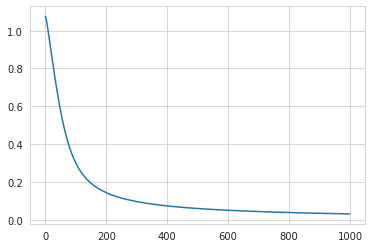

In [6]:
plt.plot(loss_values)
plt.show()

## Validação do modelo

In [7]:
mlp.predict_proba(x_validacao[:1])

array([[9.99133041e-01, 7.14546066e-04, 1.52412693e-04]])

In [8]:
y_validacao[:1]

array([[1]])

In [9]:
preds_val_mlp[:1]

array([1])

In [10]:
mlp.predict(x_validacao[:5, :])

array([1, 1, 2, 3, 2])

In [11]:
y_validacao[:5]

array([[1],
       [1],
       [2],
       [3],
       [2]])